In [1]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import json
import data_pipeline.spatial_operations as so
warnings.filterwarnings('ignore')

In [6]:
ACS_CAT

{'Estimate!!Total: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male: SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!Under 5 year': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!5 to 9 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!10 to 14 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!15 to 17 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!18 and 19 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!20 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!21 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!22 to 24 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!25 to 29 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!30 to 34 years SEX BY AGE': 'Estimate!!Total: SEX BY AGE',
 'Estimate!!Total:!!Male:!!35 to 

In [87]:
standard_city_df_2021 = pd.read_csv("/tmp/data/standard_acs_censustract_df_2021.csv")

In [88]:
standard_city_df_2021.drop_duplicates(subset='tract')

,Unnamed: 0,City,tract,state,county,STATEFP,COUNTYFP,geometry,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: SEX BY AGE,...,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood
0,0,boston,373100,25.000000,17.0,25,17,"POLYGON ((-71.196879 42.354134, -71.1968629999...",4875.000,4875.000,...,2662.00,2204.000000,4866.000000,2662.00,2204.000000,4866.000000,2662.00,2204.000000,17,Brighton
1,1,boston,373500,25.000000,17.0,25,17,"POLYGON ((-71.199533 42.342215, -71.199506 42....",6081.000,6081.000,...,3000.00,3051.000000,6051.000000,3000.00,3051.000000,6051.000000,3000.00,3051.000000,17,Brighton
2,2,boston,373600,25.000000,17.0,25,17,"POLYGON ((-71.194791 42.330384, -71.194672 42....",6840.000,6840.000,...,2955.00,3865.000000,6820.000000,2955.00,3865.000000,6820.000000,2955.00,3865.000000,17,Brighton
3,20,boston,806,10.250000,57.0,25,25,"POLYGON ((-71.135452 42.364849, -71.135231 42....",4974.500,4974.500,...,2660.75,2313.750000,4974.500000,2660.75,2313.750000,4974.500000,2660.75,2313.750000,17,Brighton
4,21,boston,102,22.825000,95.3,25,25,"POLYGON ((-71.160899 42.358625, -71.160489 42....",3542.125,3542.125,...,1723.80,1800.225000,3524.025000,1723.80,1800.225000,3524.025000,1723.80,1800.225000,17,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13306,137,washington-dc,9503,8.500000,34.0,11,1,"POLYGON ((-76.98952800000001 38.950269, -76.98...",2876.500,2876.500,...,1386.00,1476.000000,2862.000000,1386.00,1476.000000,2862.000000,1386.00,1476.000000,20,Cluster 22
13307,138,washington-dc,9504,7.666667,47.0,11,1,"POLYGON ((-76.99912 38.946271, -76.998998 38.9...",4140.000,4140.000,...,1916.00,2083.333333,3999.333333,1916.00,2083.333333,3999.333333,1916.00,2083.333333,20,Cluster 22
13325,148,washington-dc,9508,11.000000,1.0,11,1,"POLYGON ((-77.00905 38.953334, -77.009047 38.9...",3972.000,3972.000,...,1592.00,2380.000000,3972.000000,1592.00,2380.000000,3972.000000,1592.00,2380.000000,14,Cluster 20
13326,149,washington-dc,9509,8.500000,37.0,11,1,"POLYGON ((-77.002011 38.951051, -77.000646 38....",3989.500,3989.500,...,2001.00,1944.000000,3945.000000,2001.00,1944.000000,3945.000000,2001.00,1944.000000,14,Cluster 20


In [76]:
ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"

In [77]:
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)

In [6]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [7]:
for city in set(acs_2021_standard_df['City']):
    if city in GOOD_CITY_SHAPEFILE_LOCATIONS.keys():
        ## do merge
        print(city + ": in neighborhoods")
    else:
        ## go through and add NA's to city column
        print(city + ": not in neighborhood")

detroit: in neighborhoods
new-york-city: in neighborhoods
phoenix: in neighborhoods
chicago: in neighborhoods
los-angeles: in neighborhoods
seattle: in neighborhoods
houston: in neighborhoods
louisville: in neighborhoods
denver: in neighborhoods
washington-dc: in neighborhoods
indianapolis: in neighborhoods
boston: in neighborhoods
portland: in neighborhoods
san-jose: in neighborhoods
san-diego: in neighborhoods


In [78]:
chicago = acs_2017_standard_df[acs_2021_standard_df['City'] == 'chicago']

In [79]:
int_cols = ["tract",
            "Estimate!!Total: TOTAL POPULATION",
    "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
"Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",
           "geometry"]

In [80]:
chicago_int = chicago[int_cols]

In [81]:
chicago_int['w/ int %'] = chicago_int["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"] / chicago_int["Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]

In [82]:
chicago_int

,tract,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Dial-up with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Broadband of any type: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,"Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD","Estimate!!Total:!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD",Estimate!!Total:!!With an Internet subscription!!Satellite Internet service: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Satellite Internet service!!Satellite Internet service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!With an Internet subscription!!Other service with no other type of Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!Internet access without a subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD,geometry,w/ int %
240,835600,910.000000,343.000000,143.000000,0.000000,143.000000,90.000000,36.000000,107.000000,53.000000,0.000000,0.000000,0.000000,3.000000,197.000000,"POLYGON ((-87.63581 41.80905, -87.63577 41.809...",0.416910
241,840000,2930.500000,906.000000,752.000000,6.000000,746.000000,525.500000,100.500000,616.500000,196.500000,31.500000,15.000000,0.000000,3.000000,151.000000,"POLYGON ((-87.64142 41.83811, -87.64117 41.838...",0.830022
242,836400,3308.000000,1612.000000,1109.000000,0.000000,1109.000000,904.000000,124.000000,966.000000,189.000000,37.000000,0.000000,0.000000,68.000000,435.000000,"POLYGON ((-87.60686 41.82313, -87.60681 41.823...",0.687965
243,835700,592.000000,202.000000,130.000000,0.000000,130.000000,130.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,"POLYGON ((-87.62913 41.81645, -87.62893 41.816...",0.643564
244,836100,2163.000000,743.000000,423.000000,0.000000,423.000000,322.000000,52.000000,354.000000,79.000000,28.000000,17.000000,0.000000,97.000000,223.000000,"POLYGON ((-87.62883 41.80189, -87.62880 41.801...",0.569314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,4602,4081.500000,1394.500000,1065.500000,9.666667,1055.833333,713.500000,129.333333,850.166667,304.666667,104.500000,21.666667,2.333333,82.666667,246.333333,"POLYGON ((-105.03907 39.68425, -105.03906 39.6...",0.764073
1105,4603,5152.250000,1589.000000,1289.250000,2.500000,1286.750000,784.000000,86.500000,1110.000000,418.250000,115.000000,35.000000,23.500000,87.250000,212.500000,"POLYGON ((-105.03868 39.66823, -105.03867 39.6...",0.811359
1106,4700,4957.222222,2111.444444,1733.555556,6.222222,1727.333333,1235.333333,162.333333,1514.666667,465.777778,62.222222,10.333333,2.111111,115.444444,262.444444,"POLYGON ((-105.06262 39.67928, -105.06208 39.6...",0.821028
1107,7801,3667.500000,1388.000000,1024.000000,6.500000,1017.500000,667.250000,126.750000,852.250000,344.750000,48.500000,5.500000,0.000000,29.000000,335.000000,"POLYGON ((-104.88465 39.74379, -104.88465 39.7

In [74]:
max(chicago_int['w/ int %'])
min(chicago_int['w/ int %'])

0.25630810092961487

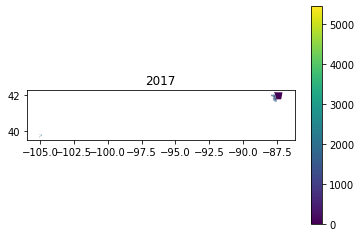

In [83]:
so.simple_map(chicago_int.drop_duplicates(subset='tract',keep='first'),  "Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD", 
                  'tract', '2017', f"/tmp/visualizations/chicago-acs-internet-tract-2017.png")

In [23]:
GOOD_CITY_SHAPEFILE_LOCATIONS = {
    "seattle": { "location" : "/tmp/neighborhood-data/seattle/seattle_ccn/City_Clerk_Neighborhoods.shp", "nhood_col" : 'HOODS_'},
    "denver": {"location": "/tmp/neighborhood-data/denver/denver_1.0.32/statistical_neighborhoods.shp", "nhood_col": "NBHD_NAME"},
    "washington-dc": {"location": "/tmp/neighborhood-data/washington-dc/DC_shapefile/Neighborhood_Clusters.shp", "nhood_col": "NAME"},
    "boston": {"location": "/tmp/neighborhood-data/boston/Boston_Neighborhoods/Boston_Neighborhoods.shp", "nhood_col": "Name"},
     "portland": {"location": "/tmp/neighborhood-data/portland/portland-neighborhood-boundaries/Neighborhood_Boundaries.shp", "nhood_col": "ID"},
    "houston": {"location": "/tmp/neighborhood-data/houston/Houston/Houston.shp", "nhood_col": "SNBNAME"},
    "indianapolis": { "location": "/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp", "nhood_col": "NAME"},
    "los-angeles": {"location": "/tmp/neighborhood-data/los-angeles/Los Angeles/Los Angeles.shp", "nhood_col": "display_na"},
    "phoenix": {"location": "/tmp/neighborhood-data/phoenix/phoenix/Villages.shp", "nhood_col": "NAME"},
    "san-francisco": { "location": "/tmp/neighborhood-data/san-francisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp", "nhood_col": "name"},
    "austin": {"location": "/tmp/neighborhood-data/austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp", "nhood_col": "neighname"},
    "dallas": { "location": "/tmp/neighborhood-data/dallas/Councils/Councils.shp", "nhood_col": "COUNCIL"},
    "san-jose": { "location": "/tmp/neighborhood-data/san-jose/Zip_Code_Boundary/Zip_Code_Boundary.shp","nhood_col": "ZIPCODE"},
    "san-diego": {"location": "/tmp/neighborhood-data/san-diego/CommunityPlanningAreas/cmty_plan_datasd.shp","nhood_col": "cpname"},
    "baltimore": {"location": "/tmp/neighborhood-data/baltimore/neighborhoods/baltimore.shp","nhood_col": "Name"},
    "detroit": {"location": "/tmp/neighborhood-data/detroit/neighborhoods/detroit.shp", "nhood_col": "name"},
    "louisville": {"location": "/tmp/neighborhood-data/louisville/neighborhoods/louisville.shp", "nhood_col": "NH_NAME"},
    "new-york-city": {"location": "/tmp/neighborhood-data/new-york-city/nycd_22a/nycd.shp", "nhood_col": "BoroCD"},
    "chicago": {"location": "/tmp/neighborhood-data/chicago/neighborhoods/geo_export_24517513-d42b-43b9-a525-49bfe729d213.shp", "nhood_col": "pri_neigh" }
    }

In [25]:
chi_nhood = geopandas.read_file(GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['location'])

In [42]:
city_nhood = chi_nhood.rename({GOOD_CITY_SHAPEFILE_LOCATIONS['chicago']['nhood_col']: 'Neighborhood'}, axis='columns')

In [43]:
city_nhood

,Neighborhood,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((-87.65833 41.92166, -87.65835 41.922..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74060 41.887..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",1.090994e+08,43311.706886,"POLYGON ((-87.74143 41.91698, -87.74141 41.916..."
94,Austin,AUSTIN,1.700378e+08,55473.345911,"POLYGON ((-87.75620 41.91547, -87.75588 41.915..."
95,Gold Coast,GOLD COAST,7.165706e+06,13685.479377,"POLYGON ((-87.62646 41.91147, -87.62640 41.911..."
96,Boystown,BOYSTOWN,3.365779e+06,9780.268985,"POLYGON ((-87.64878 41.93999, -87.64927 41.939..."


In [27]:
merged_df = geopandas.sjoin(chicago, chi_nhood, how="inner", op='intersects')

In [32]:
merged_df.drop_duplicates(subset='tract', keep='first')

,City,tract,state,county,STATEFP,COUNTYFP,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len
240,chicago,221000,32.500000,116.000000,17,031,3242.000000,0.528532,0.471468,1.000000,...,1713.500000,3242.000000,1528.500000,1713.500000,"POLYGON ((-87.71699 41.92460, -87.71675 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
241,chicago,221100,29.000000,85.000000,17,031,4918.500000,0.500559,0.488767,0.989326,...,2462.000000,4866.000000,2404.000000,2462.000000,"POLYGON ((-87.71374 41.92464, -87.71366 41.924...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
258,chicago,831200,17.000000,31.000000,17,031,4855.000000,0.483831,0.516169,1.000000,...,2349.000000,4855.000000,2506.000000,2349.000000,"POLYGON ((-87.74142 41.91698, -87.74138 41.916...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
266,chicago,832400,21.500000,73.000000,17,031,3845.500000,0.518918,0.473931,0.992849,...,1995.500000,3818.000000,1822.500000,1995.500000,"POLYGON ((-87.69720 41.91749, -87.69696 41.917...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
372,chicago,200402,17.000000,31.000000,17,031,5179.000000,0.506468,0.493532,1.000000,...,2623.000000,5179.000000,2556.000000,2623.000000,"POLYGON ((-87.73395 41.91891, -87.73371 41.918...",13,Logan Square,LOGAN SQUARE,7.125681e+07,36361.508518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,chicago,740200,28.000000,130.600000,17,031,4100.800000,0.515217,0.473956,0.989173,...,2112.800000,4056.400000,1943.600000,2112.800000,"POLYGON ((-87.72113 41.71317, -87.72088 41.713...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
744,chicago,740300,30.333333,201.666667,17,031,2919.666667,0.476196,0.523804,1.000000,...,1390.333333,2919.666667,1529.333333,1390.333333,"POLYGON ((-87.72064 41.69857, -87.72043 41.698...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
745,chicago,740400,29.666667,171.666667,17,031,5284.666667,0.339283,0.304844,0.644128,...,1793.000000,3404.000000,1611.000000,1793.000000,"POLYGON ((-87.73973 41.69089, -87.73949 41.690...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539
862,chicago,823200,17.000000,31.000000,17,031,4753.000000,0.512729,0.487271,1.000000,...,2437.000000,4753.000000,2316.000000,2437.000000,"POLYGON ((-87.77857 41.68297, -87.77749 41.682...",22,Mount Greenwood,"MOUNT GREENWOOD,MORGAN PARK",7.558429e+07,48665.130539


In [37]:
pd.NA

<NA>